In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows 
#warnings.filterwarnings('ignore') # ignore warnings



In [2]:
# 🔧 Basic functions
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.info()}.\n")
    return data.sample(5)

def clean_columns(data): # clean columns names
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    return data.sample(0)

def explore_data(data): # sum & returns duplicates, NaN & empty spaces added a table with percentage missing
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
    nulls.sort_values('percentage', ascending = False)
    print(nulls)
    return exploration

In [3]:
df_1=pd.read_csv('D:\Ironhack\datos_proyecto\eurostat\estat_urb_cenv_en.csv')  
df_1=df_1.pivot(index=['cities','TIME_PERIOD'],columns='indic_ur',values='OBS_VALUE')
df_1=df_1.reset_index()

In [4]:
df_1.head(4)

indic_ur,cities,TIME_PERIOD,EN1002V,EN1003V,EN1004V,EN1005V,EN2002V,EN2003V,EN2005V,EN2025V,EN2026V,EN2027V,EN2029I,EN2032I,EN2033I,EN2035I,EN2036I,EN3003V,EN3010V,EN3011V,EN3012V,EN3013V,EN4008V,EN5200V,EN5201V,EN5202V,EN5203V,EN5204V,EN5205V,EN5206V,EN5207V
0,AT,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,611080000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609490000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,604330000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT001C,1989,NaN,NaN,NaN,NaN,NaN,3.83,NaN,NaN,33.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12762 entries, 0 to 12761
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cities       12762 non-null  object 
 1   TIME_PERIOD  12762 non-null  int64  
 2   EN1002V      1735 non-null   float64
 3   EN1003V      1998 non-null   float64
 4   EN1004V      2004 non-null   float64
 5   EN1005V      2009 non-null   float64
 6   EN2002V      5508 non-null   float64
 7   EN2003V      5685 non-null   float64
 8   EN2005V      4488 non-null   float64
 9   EN2025V      5318 non-null   float64
 10  EN2026V      5866 non-null   float64
 11  EN2027V      4414 non-null   float64
 12  EN2029I      14 non-null     float64
 13  EN2032I      27 non-null     float64
 14  EN2033I      38 non-null     float64
 15  EN2035I      36 non-null     float64
 16  EN2036I      31 non-null     float64
 17  EN3003V      2921 non-null   float64
 18  EN3010V      2305 non-null   float64
 19  EN30

In [6]:
columns = df_1.columns
subsets = df_1['cities'].unique()

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=columns)

# Loop through each subset (category) in cities
for subset in subsets:
    subset_data = df_1[df_1['cities'] == subset]
    subset_values = {}

    # Loop through each column
    for column in columns:
        column_values = subset_data[column]

        # Find the first non-null value
        first_non_null = column_values.dropna().iloc[0] if not column_values.isnull().all() else None

        # Store the first non-null value for the column
        subset_values[column] = first_non_null

    # Convert the subset_values dictionary to a DataFrame
    subset_df = pd.DataFrame(subset_values, index=[0])

    # Concatenate the subset DataFrame to the result DataFrame
    result_df = pd.concat([result_df, subset_df], ignore_index=True)


In [7]:
result_df.head(10)

,cities,TIME_PERIOD,EN1002V,EN1003V,EN1004V,EN1005V,EN2002V,EN2003V,EN2005V,EN2025V,EN2026V,EN2027V,EN2029I,EN2032I,EN2033I,EN2035I,EN2036I,EN3003V,EN3010V,EN3011V,EN3012V,EN3013V,EN4008V,EN5200V,EN5201V,EN5202V,EN5203V,EN5204V,EN5205V,EN5206V,EN5207V
0,AT,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,611080000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT001C,1989,5.3,20.7,-1.5,665.0,38.0,3.83,28.0,6112.0,33.6,23.1,NaN,NaN,NaN,NaN,NaN,140585000.0,1.3,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT002C,1990,5.76,20.5,-6.0,560.0,59.5,7.2,48.5,8838.0,40.0,33.6,NaN,NaN,NaN,NaN,NaN,17433000.0,1.28,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT003C,1989,4.66,19.8,-2.5,928.0,6.0,1.0,21.0,2252.0,40.6,25.9,NaN,NaN,NaN,NaN,NaN,24504000.0,0.96,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT004C,1989,4.79,19.9,-2.5,1408.0,93.0,3.0,8.0,10110.0,21.69,24.0,NaN,NaN,NaN,NaN,NaN,10462000.0,1.44,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AT005C,1993,4.63,19.8,-2.7,1014.0,20.0,0.0,None,4774.0,35.0,None,NaN,NaN,NaN,NaN,NaN,10006000.0,1.41,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AT006C,1992,None,None,None,None,45.0,1.0,27.5,7964.0,27.7,25.3,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,0.42,15.93,9.09,6.32,0.78,2.75,31.05,33.67
7,BE,1991,4.6,19.0,0.0,794.0,32.0,None,287.0,None,None,None,NaN,NaN,NaN,NaN,NaN,619270000.0,None,None,NaN,NaN,NaN,None,None,None,None,None,None,None,None
8,BE001C,1990,4.25,17.4,2.4,780.0,13.0,2.0,75.0,2409.0,50.5,39.6,NaN,NaN,NaN,NaN,NaN,59388047.0,1.87,100.0,100.0,99.78,490.67,16.19,26.77,15.27,13.97,0.94,13.16,2.48,11.22
9,BE002C,1990,4.44,17.05,2.25,776.0,11.0,0.0,49.0,1866.0,42.0,37.0,NaN,NaN,NaN,NaN,NaN,116105000.0,1.22,92.0,99.0,98.73,304.55,10.55,13.14,8.95,41.74,1.24,6.84,13.68,3.87


In [8]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cities       895 non-null    object
 1   TIME_PERIOD  895 non-null    object
 2   EN1002V      416 non-null    object
 3   EN1003V      450 non-null    object
 4   EN1004V      454 non-null    object
 5   EN1005V      451 non-null    object
 6   EN2002V      479 non-null    object
 7   EN2003V      478 non-null    object
 8   EN2005V      509 non-null    object
 9   EN2025V      438 non-null    object
 10  EN2026V      497 non-null    object
 11  EN2027V      472 non-null    object
 12  EN2029I      14 non-null     object
 13  EN2032I      26 non-null     object
 14  EN2033I      36 non-null     object
 15  EN2035I      33 non-null     object
 16  EN2036I      30 non-null     object
 17  EN3003V      532 non-null    object
 18  EN3010V      528 non-null    object
 19  EN3011V      323 non-null    

In [9]:
columns_to_convert = result_df.columns[2:]  # Select columns from the third column (index 2) onwards
result_df[columns_to_convert] = result_df[columns_to_convert].astype(float)

In [10]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cities       895 non-null    object 
 1   TIME_PERIOD  895 non-null    object 
 2   EN1002V      416 non-null    float64
 3   EN1003V      450 non-null    float64
 4   EN1004V      454 non-null    float64
 5   EN1005V      451 non-null    float64
 6   EN2002V      479 non-null    float64
 7   EN2003V      478 non-null    float64
 8   EN2005V      509 non-null    float64
 9   EN2025V      438 non-null    float64
 10  EN2026V      497 non-null    float64
 11  EN2027V      472 non-null    float64
 12  EN2029I      14 non-null     float64
 13  EN2032I      26 non-null     float64
 14  EN2033I      36 non-null     float64
 15  EN2035I      33 non-null     float64
 16  EN2036I      30 non-null     float64
 17  EN3003V      532 non-null    float64
 18  EN3010V      528 non-null    float64
 19  EN3011V 

In [11]:
nulls = pd.DataFrame(result_df.isna().sum()*100/len(result_df), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
EN2029I,98.435754
EN2032I,97.094972
EN2036I,96.648045
EN2035I,96.312849
EN2033I,95.977654
EN3013V,66.592179
EN3011V,63.910615
EN3012V,55.642458
EN1002V,53.519553
EN5206V,51.173184


In [12]:
#Third part of dictionary 
df_headers=pd.read_excel(r'D:\Ironhack\datos_proyecto\eurostat\more columns.xlsx',sheet_name='urb_lenv')  
df_headers=df_headers.drop(columns=['Unnamed: 0'])
rename={'code':'Column Name','description':'label'}
df_headers = df_headers.rename(columns=rename)
dictionary_df=df_headers
#dictionary_df=pd.merge(left=dictionary_df,right=df_headers,how='left',left_on=['Column Name'],right_on=['Column Name'])
#dictionary_df=dictionary_df.reset_index(drop=True)
#dictionary_df['label'] = dictionary_df['label_x'].fillna(dictionary_df['label_y'])
#dictionary_df = dictionary_df.drop(['label_x', 'label_y'], axis=1)

In [13]:
dictionary_df

,Column Name,label
0,EN1002V,Total number of hours of sunshine per day
1,EN1003V,Average temperature of warmest month - degrees
2,EN1004V,Average temperature of coldest month - degrees
3,EN1005V,Rainfall - litre/m²
4,EN2002V,Number of days ozone O3 concentrations exceed ...
5,EN2003V,Number of hours nitrogen dioxide NO2 concentra...
6,EN2005V,Number of days particulate matter PM10 concent...
7,EN2025V,Accumulated ozone concentration in excess 70 µ...
8,EN2026V,Annual average concentration of NO2 (µg/m³)
9,EN2027V,Annual average concentration of PM10 (µg/m³)


In [14]:
nan_df=pd.merge(left=nulls,right=dictionary_df,how='left',left_index=True,right_on=['Column Name'])
nan_df=nan_df.reset_index(drop=True)
nan_df.sort_values(by='percentage',ascending=False)

,percentage,Column Name,label
12,98.435754,EN2029I,Proportion of residents exposed to air traffic...
13,97.094972,EN2032I,Proportion of residents exposed to rail traffi...
16,96.648045,EN2036I,Proportion of residents exposed to rail traffi...
15,96.312849,EN2035I,Proportion of residents exposed to road traffi...
14,95.977654,EN2033I,Proportion of residents exposed to road traffi...
21,66.592179,EN3013V,Share of population connected to sewerage trea...
19,63.910615,EN3011V,Share of the urban waste water load (in popula...
20,55.642458,EN3012V,Share of population connected to potable drink...
2,53.519553,EN1002V,Total number of hours of sunshine per day
29,51.173184,EN5206V,Share of land (%): Agricultural areas


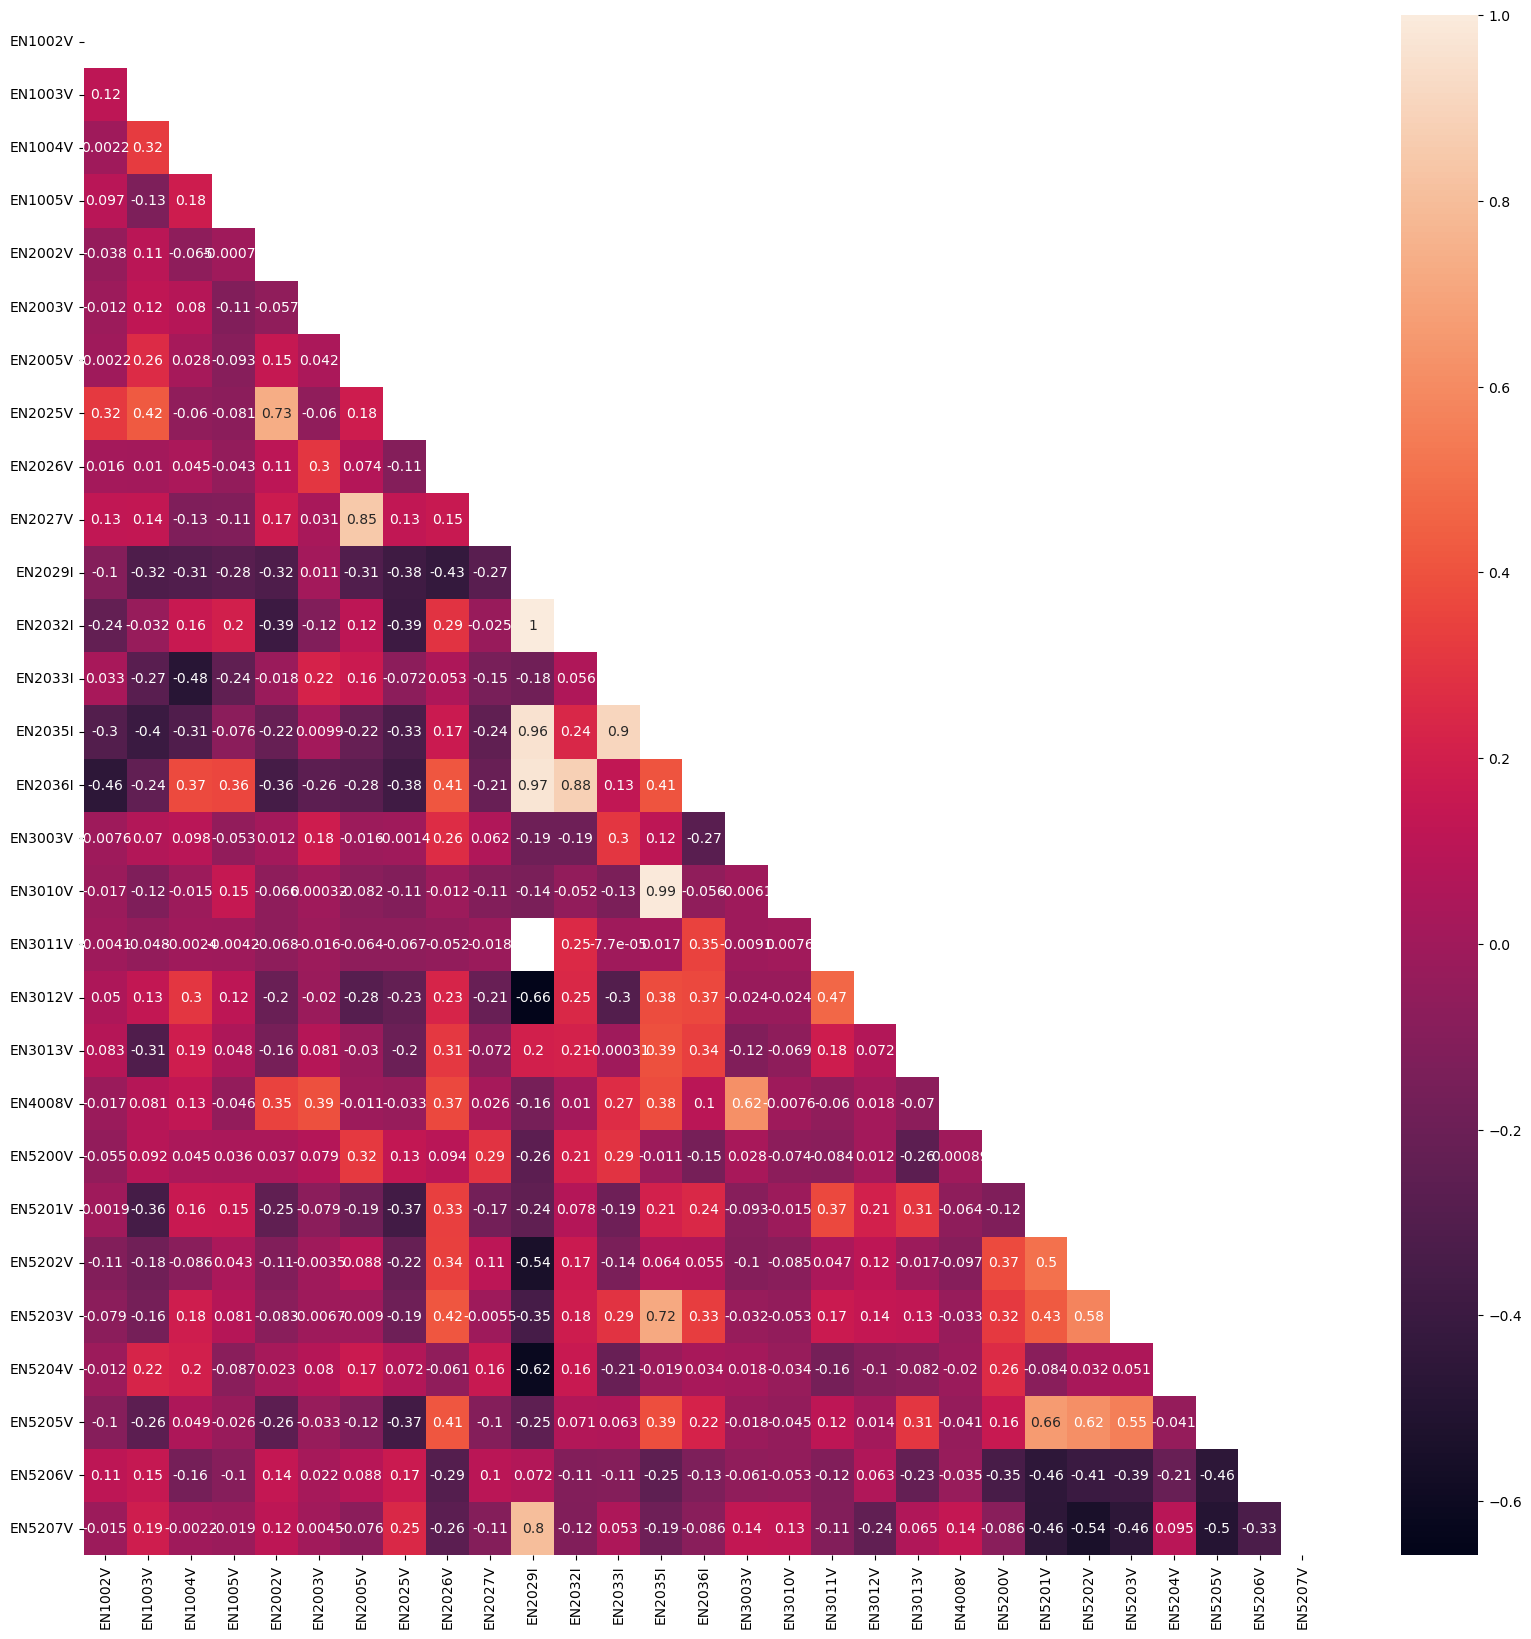

In [17]:
df=result_df.drop(columns=['cities','TIME_PERIOD'])
#Check correlation for each feature agaisnt each other
correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [16]:
print(correlations_matrix)

          EN1002V   EN1003V   EN1004V   EN1005V   EN2002V   EN2003V   EN2005V  \
EN1002V  1.000000  0.118549  0.002232  0.097490 -0.037526 -0.012110 -0.002240   
EN1003V  0.118549  1.000000  0.321065 -0.129541  0.105427  0.120443  0.257947   
EN1004V  0.002232  0.321065  1.000000  0.178975 -0.064714  0.080340  0.027796   
EN1005V  0.097490 -0.129541  0.178975  1.000000 -0.000788 -0.114923 -0.092792   
EN2002V -0.037526  0.105427 -0.064714 -0.000788  1.000000 -0.057102  0.150376   
EN2003V -0.012110  0.120443  0.080340 -0.114923 -0.057102  1.000000  0.041965   
EN2005V -0.002240  0.257947  0.027796 -0.092792  0.150376  0.041965  1.000000   
EN2025V  0.317607  0.424551 -0.059802 -0.081260  0.729167 -0.059680  0.182251   
EN2026V  0.016437  0.010219  0.044537 -0.043250  0.110674  0.304384  0.074245   
EN2027V  0.127692  0.137105 -0.126449 -0.114745  0.174208  0.030928  0.846592   
EN2029I -0.101704 -0.318775 -0.306958 -0.280425 -0.315374  0.011284 -0.306678   
EN2032I -0.235231 -0.032457 